In [1]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
data = load_breast_cancer()
x, y = data["data"], data["target"]

In [6]:
data["target_names"]

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# Dividindo os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
clf = LinearSVC() )  # inicializa o modelo 
clf.fit(x_train, y_train)# Treina o modelo 

LinearSVC()

In [11]:
clf.score(x_test, y_test) #precisao do modelo

0.9385964912280702

In [13]:
clf.predict([x_test[0]])

array([1])

In [14]:
# cria o explicador SHAP usando o KernelExplainer com uma amostra dos dados
explainer = shap.KernelExplainer(clf.predict,shap.kmeans(x_train,10))

In [15]:
shap_values = explainer.shap_values(x_test)

  0%|          | 0/114 [00:00<?, ?it/s]

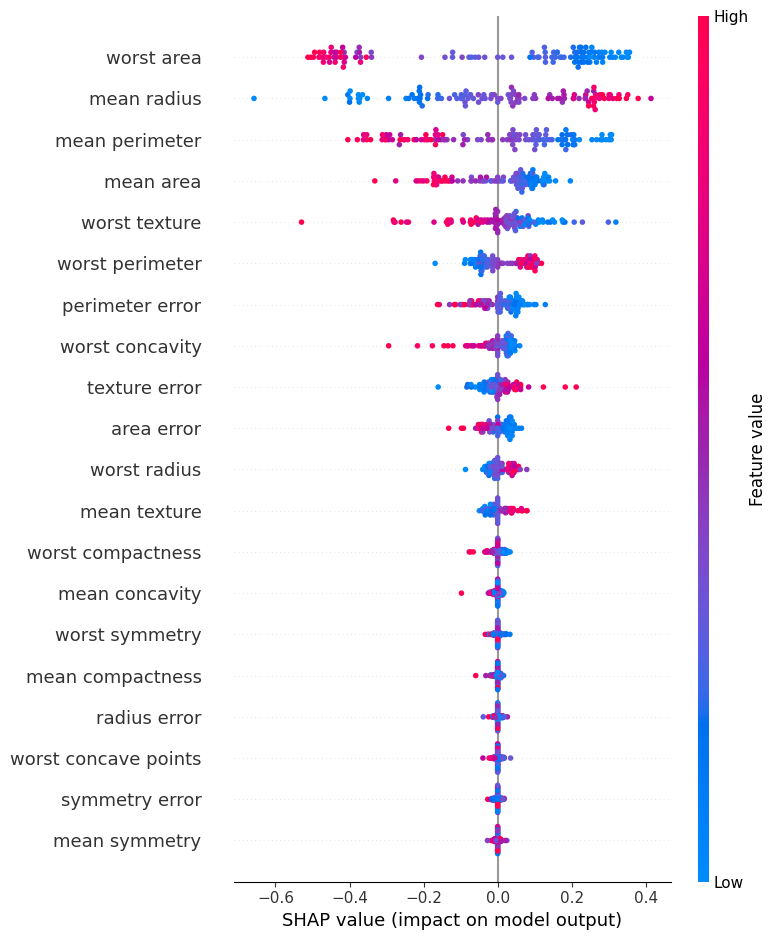

In [16]:
#visualizacao que ajuda a entender o impacto de cada feature no modelo, mostrando a importancia de cada uma das variaveis para a previsao final
shap.summary_plot(shap_values,x_test, feature_names = data["feature_names"])

Eixo x do grafico obtemos o impacto na saida do modelo(proximo de 0 nao e tao relevante, diferentemente se tiver muito para q esquerda/direita, sendo relevante), tendo o grafico de cores sinalizando ser um valor alto ou pequeno

In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], x_test[0], feature_names = data["feature_names"])

grafico de forca utilizado para especificacao de cada feature, sendo classificados como high ou lower, os nuemros do shap_values e x_test podem ser modificadas para decisoes individuais

In [25]:
mean_abs_shap_values = np.abs(shap_values).mean(axis = 0) #media do valor absoluto para cada feature

In [26]:
feature_names = data["feature_names"] #nome das features
feature_importance = zip(feature_names, mean_abs_shap_values) #combaincao do nome com sua iomportancia de media

In [27]:
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse = True) #ordena na mai alta para a mais baixa

In [29]:
for feature, importance in sorted_feature_importance:
    print(feature, ":", importance)

worst area : 0.27638794233295827
mean radius : 0.1901791207196321
mean perimeter : 0.17097738324521544
mean area : 0.09821520625316099
worst texture : 0.08324145337797655
worst perimeter : 0.05685313998120911
perimeter error : 0.0483425147340129
worst concavity : 0.035315310888237215
texture error : 0.03135152164370736
area error : 0.029946047421627386
worst radius : 0.023766696002009667
mean texture : 0.021401832878142863
worst compactness : 0.012688870926251393
mean concavity : 0.007599501132281363
worst symmetry : 0.006639741676493618
mean compactness : 0.005819375022349876
radius error : 0.005789895611586787
worst concave points : 0.005658969597168694
symmetry error : 0.005651580547262932
mean symmetry : 0.005517886944427212
concavity error : 0.005508888387977549
compactness error : 0.005319788365050694
mean fractal dimension : 0.005133639348891586
worst smoothness : 0.005003445967856877
mean concave points : 0.005000948247975379
smoothness error : 0.0049150582835755414
mean smooth